In [2]:
# Imports functions into the program
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#These are imported specifically for the use of the histogram.
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from matplotlib import gridspec
import scipy

#Imported for categorization of the Sources
from scipy import stats
import astropy.stats as ast
from astropy.visualization import hist
import urllib.request
# import gbm
import glob
# from gbm.data import TTE
# from gbm.binning.unbinned import bin_by_time
# from gbm.plot import Lightcurve
# from gbm.data.primitives import EventList, TimeBins
# from gbm.background import BackgroundFitter
# from gbm.background.binned import Polynomial
# from gbm.background import BackgroundRates
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
# from lmfit.models import StepModel, LinearModel

In [107]:

base = 'shared_plot_arrays/'

# bcu_flares = np.load(base+'bcu_flares.npy')
# bll_flares = np.load(base+'bll_flares.npy')
# fsrq_flares = np.load(base+'fsrq_flares.npy')
# total_flares = np.load(base+'total_flares.npy')

bcu_fluencecount=np.load(base+'bcu_fluencecount.npy')
bll_fluencecount=np.load(base+'bll_fluencecount.npy')
fsrq_fluencecount=np.load(base+'fsrq_fluencecount.npy')[:-1]
bcu_fluencecount_error=np.sqrt(bcu_fluencecount)
bll_fluencecount_error=np.sqrt(bll_fluencecount)
fsrq_fluencecount_error=np.sqrt(fsrq_fluencecount)
# bcu_fluencecount_error=np.load(base+'bcu_fluencecount_error.npy')
# bll_fluencecount_error=np.load(base+'bll_fluencecount_error.npy')
# fsrq_fluencecount_error=np.load(base+'fsrq_fluencecount_error.npy')[:-1]
bll_fluencethresholds=np.load(base+'bll_fluencethresholds.npy')
bcu_fluencethresholds=np.load(base+'bcu_fluencethresholds.npy')
fsrq_fluencethresholds=np.load(base+'fsrq_fluencethresholds.npy')[:-1]

simulated_bcu_fluencecount=np.load(base+'simulated_bcu_fluencecount.npy')
simulated_bll_fluencecount=np.load(base+'simulated_bll_fluencecount.npy')
simulated_fsrq_fluencecount=np.load(base+'simulated_fsrq_fluencecount.npy')
simulated_bcu_fluencethresholds=np.load(base+'simulated_bcu_fluencethresholds.npy')
simulated_bll_fluencethresholds=np.load(base+'simulated_bll_fluencethresholds.npy')
simulated_fsrq_fluencethresholds=np.load(base+'simulated_fsrq_fluencethresholds.npy')
simulated_total_fluencecount=np.load(base+'simulated_total_fluencecount.npy')
simulated_total_fluencethresholds=np.load(base+'simulated_total_fluencethresholds.npy')

red_noise_simulated_bcu_fluencecount=np.load(base+'red_noise_simulated_bcu_fluencecount.npy')
red_noise_simulated_bll_fluencecount=np.load(base+'red_noise_simulated_bll_fluencecount.npy')
red_noise_simulated_fsrq_fluencecount=np.load(base+'red_noise_simulated_fsrq_fluencecount.npy')
red_noise_simulated_bcu_fluencethresholds=np.load(base+'red_noise_simulated_bcu_fluencethresholds.npy')
red_noise_simulated_bll_fluencethresholds=np.load(base+'red_noise_simulated_bll_fluencethresholds.npy')
red_noise_simulated_fsrq_fluencethresholds=np.load(base+'red_noise_simulated_fsrq_fluencethresholds.npy')
red_noise_simulated_total_fluencecount=np.load(base+'red_noise_simulated_total_fluencecount.npy')
red_noise_simulated_total_fluencethresholds=np.load(base+'red_noise_simulated_total_fluencethresholds.npy')

white_noise_simulated_bcu_fluencecount=np.load(base+'white_noise_simulated_bcu_fluencecount.npy')
white_noise_simulated_bll_fluencecount=np.load(base+'white_noise_simulated_bll_fluencecount.npy')
white_noise_simulated_fsrq_fluencecount=np.load(base+'white_noise_simulated_fsrq_fluencecount.npy')
white_noise_simulated_bcu_fluencethresholds=np.load(base+'white_noise_simulated_bcu_fluencethresholds.npy')
white_noise_simulated_bll_fluencethresholds=np.load(base+'white_noise_simulated_bll_fluencethresholds.npy')
white_noise_simulated_fsrq_fluencethresholds=np.load(base+'white_noise_simulated_fsrq_fluencethresholds.npy')
white_noise_simulated_bcu_fluencethresholds=np.load(base+'white_noise_simulated_bcu_fluencethresholds.npy')
white_noise_simulated_total_fluencecount=np.load(base+'white_noise_simulated_total_fluencecount.npy')
white_noise_simulated_total_fluencethresholds=np.load(base+'white_noise_simulated_total_fluencethresholds.npy')

#getting rid of the last value of each array. The last value in fluence count is a 0, so we don't need it.
# It also messes up the math later on.
# fsrq_fluencecount[-1]=0.1
# fsrq_fluencethresholds[-1]=120
# fsrq_fluencecount_error[-1]=0.1

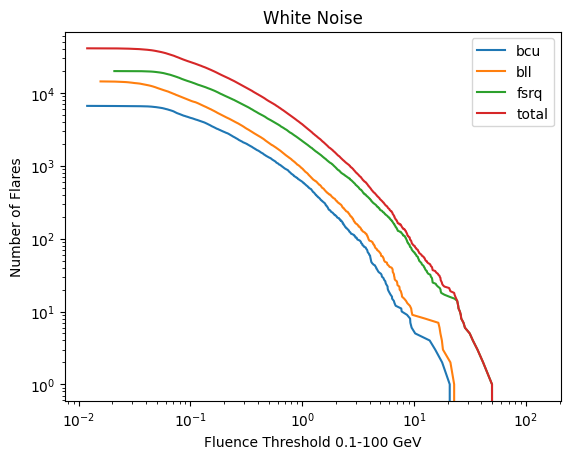

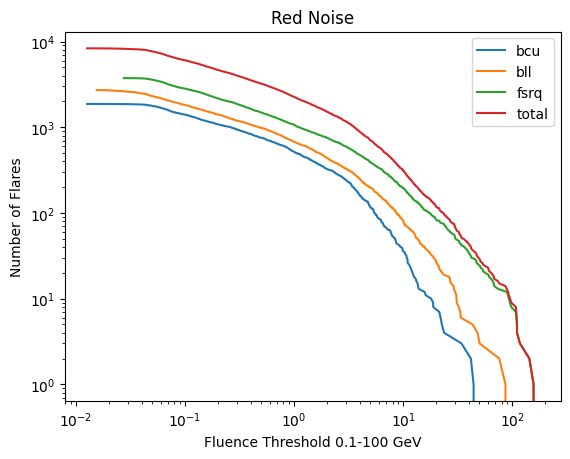

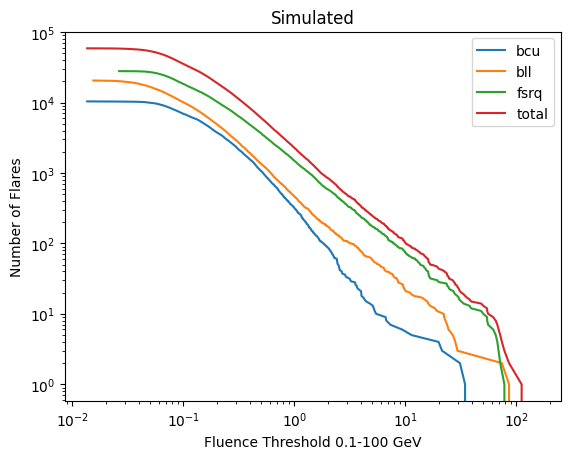

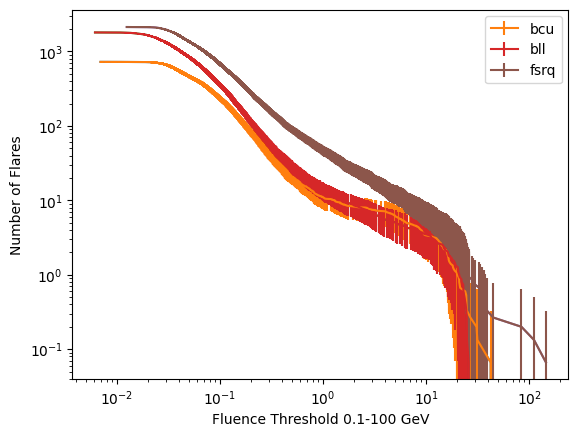

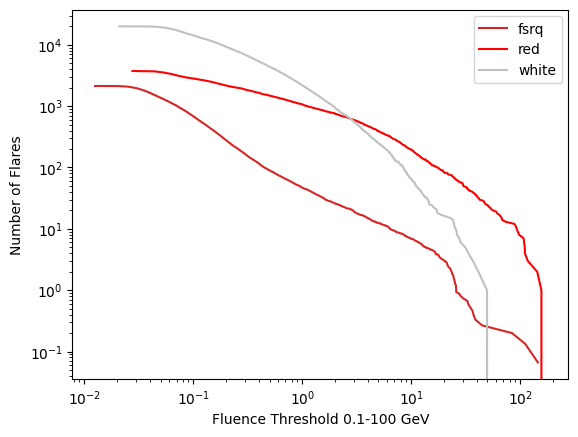

In [109]:
cl = ['#FF005D','#1E88E5','#FFC107','000000'] # List of colours for categories

plt.plot(white_noise_simulated_bcu_fluencethresholds,white_noise_simulated_bcu_fluencecount, label='bcu')
plt.plot(white_noise_simulated_bll_fluencethresholds,white_noise_simulated_bll_fluencecount,label='bll')
plt.plot(white_noise_simulated_fsrq_fluencethresholds,white_noise_simulated_fsrq_fluencecount,label='fsrq')
plt.plot(white_noise_simulated_total_fluencethresholds,white_noise_simulated_total_fluencecount, label='total')
plt.legend()
plt.title('White Noise')
plt.xlabel('Fluence Threshold 0.1-100 GeV')
plt.ylabel('Number of Flares')
plt.yscale('log')
plt.xscale('log')
plt.show()

plt.plot(red_noise_simulated_bcu_fluencethresholds,red_noise_simulated_bcu_fluencecount,label='bcu')
plt.plot(red_noise_simulated_bll_fluencethresholds,red_noise_simulated_bll_fluencecount,label='bll')
plt.plot(red_noise_simulated_fsrq_fluencethresholds,red_noise_simulated_fsrq_fluencecount,label='fsrq')
plt.plot(red_noise_simulated_total_fluencethresholds,red_noise_simulated_total_fluencecount,label='total')
plt.legend()
plt.title('Red Noise')
plt.xlabel('Fluence Threshold 0.1-100 GeV')
plt.ylabel('Number of Flares')
plt.yscale('log')
plt.xscale('log')
plt.show()

plt.plot(simulated_bcu_fluencethresholds,simulated_bcu_fluencecount,label='bcu')
plt.plot(simulated_bll_fluencethresholds,simulated_bll_fluencecount,    label='bll')
plt.plot(simulated_fsrq_fluencethresholds,simulated_fsrq_fluencecount,label='fsrq')
plt.plot(simulated_total_fluencethresholds,simulated_total_fluencecount,label='total')
plt.legend()
plt.title('Simulated')
plt.xlabel('Fluence Threshold 0.1-100 GeV')
plt.ylabel('Number of Flares')
plt.yscale('log')
plt.xscale('log')
plt.show()

plt.figure()
plt.plot(bcu_fluencethresholds,bcu_fluencecount)
plt.errorbar(bcu_fluencethresholds,bcu_fluencecount,yerr=bcu_fluencecount_error,label='bcu')
plt.yscale('log')
plt.xscale('log')
plt.plot(bll_fluencethresholds,bll_fluencecount)
plt.errorbar(bll_fluencethresholds,bll_fluencecount,yerr=bll_fluencecount_error,label='bll')
plt.yscale('log')
plt.xscale('log')
plt.plot(fsrq_fluencethresholds,fsrq_fluencecount)
plt.errorbar(fsrq_fluencethresholds,fsrq_fluencecount,yerr=fsrq_fluencecount_error,label='fsrq')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Fluence Threshold 0.1-100 GeV')
plt.ylabel('Number of Flares')
plt.legend()

plt.figure()
plt.plot(fsrq_fluencethresholds,fsrq_fluencecount,color="tab:red",label='fsrq')
#plt.plot(simulated_fsrq_fluencethresholds,simulated_fsrq_fluencecount,label='fsrqsim')
plt.plot(red_noise_simulated_fsrq_fluencethresholds,red_noise_simulated_fsrq_fluencecount,label='red',color="red")
plt.plot(white_noise_simulated_fsrq_fluencethresholds,white_noise_simulated_fsrq_fluencecount,label='white',color="silver")
plt.legend()
plt.xlabel('Fluence Threshold 0.1-100 GeV')
plt.ylabel('Number of Flares')
plt.yscale('log')
plt.xscale('log')

## Interpolation Test

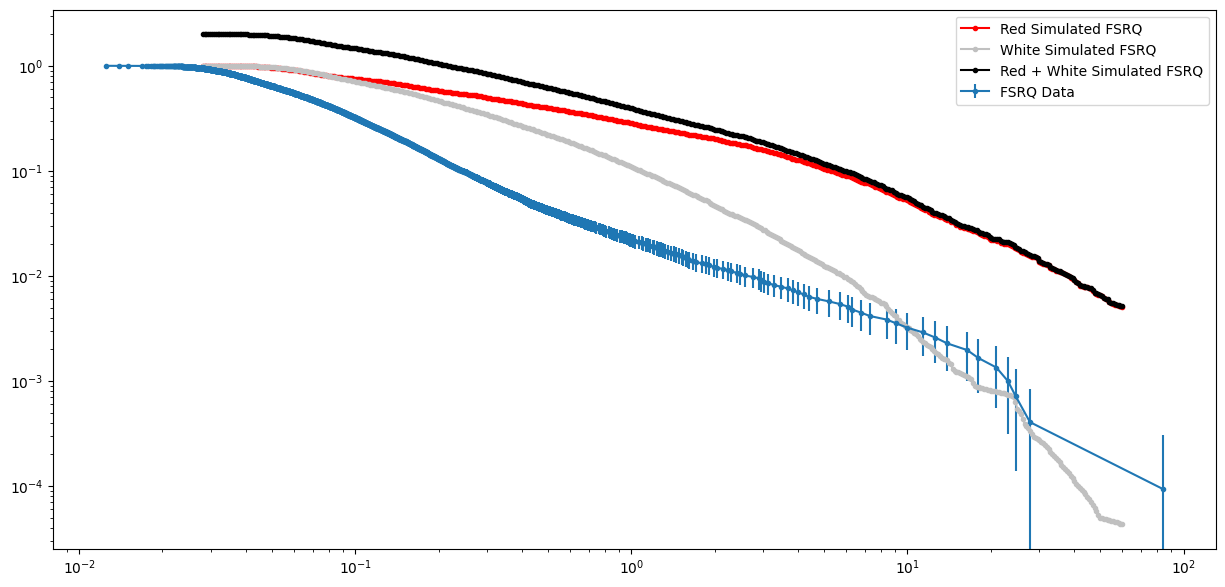

In [111]:
newx=np.logspace(np.log10(0.028),np.log10(60),500)
whitesimfsrqspline = interp1d(white_noise_simulated_fsrq_fluencethresholds, white_noise_simulated_fsrq_fluencecount,fill_value='extrapolate')
redsimfsrqspline = interp1d(red_noise_simulated_fsrq_fluencethresholds, red_noise_simulated_fsrq_fluencecount,fill_value='extrapolate')
plt.figure(figsize=(15,7))
plt.errorbar(fsrq_fluencethresholds[::10], fsrq_fluencecount[::10]/np.max(fsrq_fluencecount), yerr=fsrq_fluencecount_error[::10]/np.max(fsrq_fluencecount), label='FSRQ Data', marker='.')
plt.plot(newx, redsimfsrqspline(newx)/np.max(redsimfsrqspline(newx)), label='Red Simulated FSRQ', marker='.', color='red')
plt.plot(newx, whitesimfsrqspline(newx)/np.max(whitesimfsrqspline(newx)), label='White Simulated FSRQ', marker='.', color='silver')
plt.plot(newx, redsimfsrqspline(newx)/np.max(redsimfsrqspline(newx))+ whitesimfsrqspline(newx)/np.max(whitesimfsrqspline(newx)), label='Red + White Simulated FSRQ', marker='.', color='black')
plt.legend()
plt.yscale('log')
plt.xscale('log')

## Try to fit a smoothly broken powelaw

$$
f(E) = N \left(\frac{E}{E_0}\right)^{-\Gamma_1} 
\left[ 1 + \left( \frac{E}{E_b} \right)^{\Delta} \right]^{\frac{\Gamma_1 - \Gamma_2}{\Delta}}
$$

Where:

- \( E \) : Energy (independent variable)
- \( N \) : Normalization at \( E_0 \)
- \( E_0 \) : Pivot energy (reference energy)
- \( E_b \) : Break energy
- \( \Gamma_1 \) : Spectral index before the break
- \( \Gamma_2 \) : Spectral index after the break
- \( \Delta \) : Smoothness parameter of the break

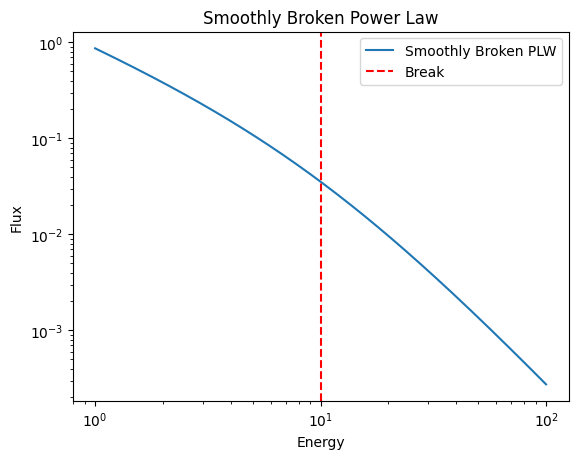

In [112]:
def smoothly_broken_power_law(x, N, x0, xb, Gamma1, Gamma2, Delta):

    # Convert inputs to arrays if possible for vectorized operations
    x = np.array(x, ndmin=1)  # Ensures E is at least 1D

    # Compute the SBPL
    term = (1.0 + (x / xb)**Delta) ** ((Gamma1 - Gamma2) / Delta)
    f = N * (x / x0)**(-Gamma1) * term

    # Return as array or scalar based on input
    return f if x.size > 1 else f[0]

# Example parameters
N = 1.0      # Normalization at E0
E0 = 1.0     # Pivot energy (e.g. 1 keV)
Eb = 10.0    # Break energy (e.g. 10 keV)
Gamma1 = 1.0 # Slope before break
Gamma2 = 2.5 # Slope after break
Delta = 1.0  # Smoothness parameter

E_values = np.logspace(0, 2, 200) # Energies from 1 to 100 (if E0=1)
f_values = smoothly_broken_power_law(E_values, N, E0, Eb, Gamma1, Gamma2, Delta)

plt.loglog(E_values, f_values, label='Smoothly Broken PLW')
plt.axvline(Eb, color='r', linestyle='--', label='Break')
plt.xlabel('Energy')
plt.ylabel('Flux')
plt.title('Smoothly Broken Power Law')
plt.legend()
plt.show()



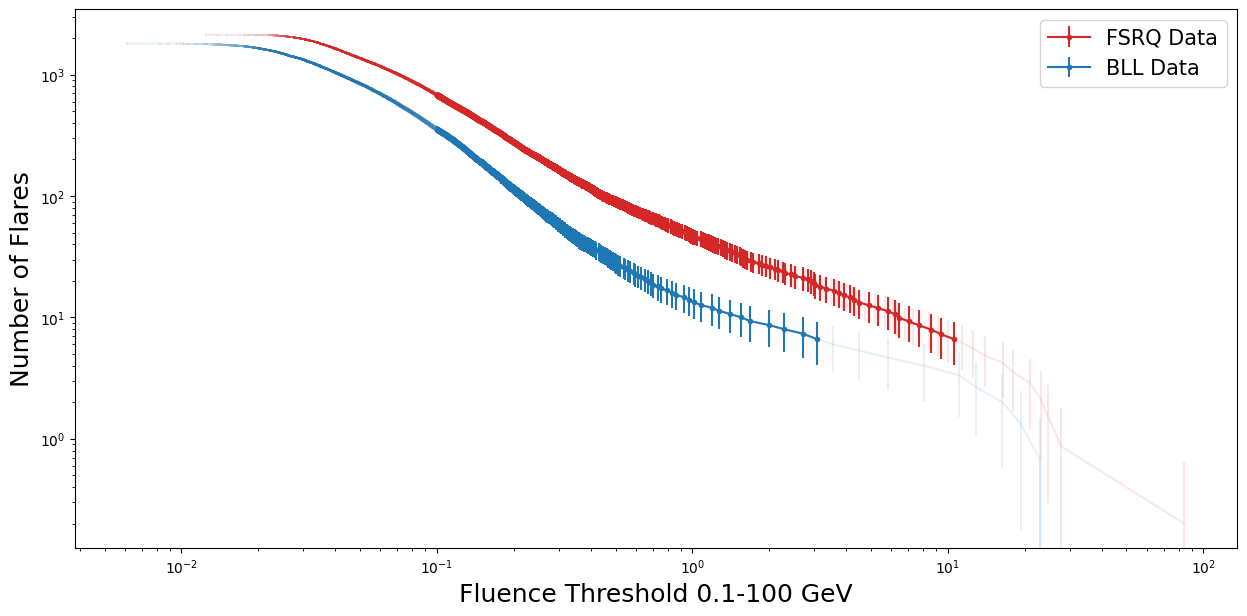

In [118]:
fsrq_sel = np.where((fsrq_fluencecount>6)&(fsrq_fluencethresholds>0.1))
bll_sel = np.where((bll_fluencecount>6)&(bll_fluencethresholds>0.1))

plt.figure(figsize=(15,7))
plt.errorbar(fsrq_fluencethresholds[::10], fsrq_fluencecount[::10], yerr=fsrq_fluencecount_error[::10], marker='', alpha=0.1, color='tab:red')
plt.errorbar(fsrq_fluencethresholds[fsrq_sel][::10], fsrq_fluencecount[fsrq_sel][::10], yerr=fsrq_fluencecount_error[fsrq_sel][::10], label='FSRQ Data', marker='.', color='tab:red')
plt.errorbar(bll_fluencethresholds[::10], bll_fluencecount[::10], yerr=bll_fluencecount_error[::10], marker='', alpha=0.1)
plt.errorbar(bll_fluencethresholds[bll_sel][::10], bll_fluencecount[bll_sel][::10], yerr=bll_fluencecount_error[bll_sel][::10], label='BLL Data', marker='.', color='tab:blue')
plt.legend(fontsize=15)
plt.xlabel('Fluence Threshold 0.1-100 GeV', size=18)
plt.ylabel('Number of Flares', size=18)
plt.yscale('log')
plt.xscale('log')

/var/folders/c_/m9xq6z1d7ng4l884vymz4c240000gq/T/ipykernel_27426/2060989341.py:7: RuntimeWarning: invalid value encountered in power
  term = (1.0 + (x / xb)**Delta) ** ((Gamma1 - Gamma2) / Delta)
/var/folders/c_/m9xq6z1d7ng4l884vymz4c240000gq/T/ipykernel_27426/2060989341.py:8: RuntimeWarning: invalid value encountered in power
  f = N * (x / x0)**(-Gamma1) * term


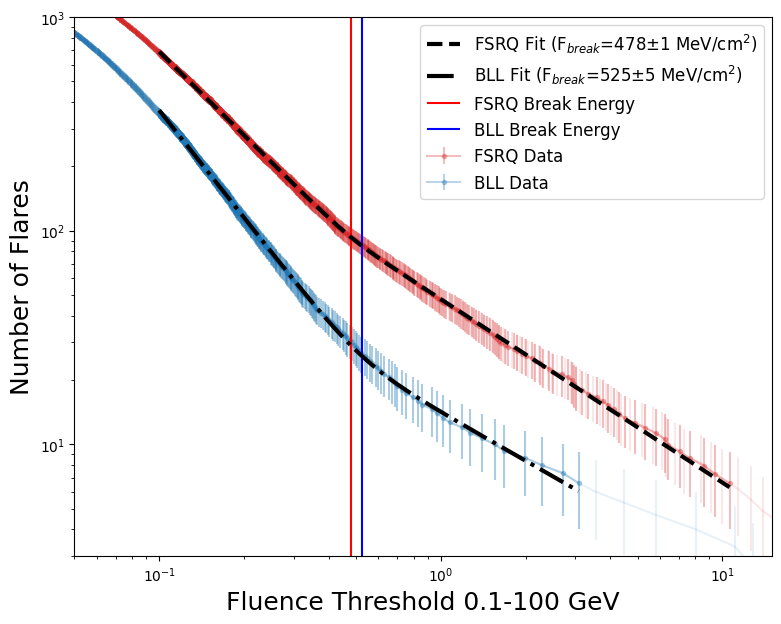

In [130]:
fsrq_data_tofit = fsrq_fluencecount[fsrq_sel]
fsrq_data_tofit_error = np.sqrt(fsrq_fluencecount[fsrq_sel])
bll_data_tofit = bll_fluencecount[bll_sel]
bll_data_tofit_error = np.sqrt(bll_fluencecount[bll_sel])

fsrq_sbpl_ptot, fsrq_sbpl_cov = curve_fit(smoothly_broken_power_law, fsrq_fluencethresholds[fsrq_sel], fsrq_data_tofit, sigma=fsrq_data_tofit_error, p0=[1, 1, 1, 1, 1, 1])
fsrq_sbpl_err = np.sqrt(np.diag(fsrq_sbpl_cov))

bll_sbpl_ptot, bll_sbpl_cov = curve_fit(smoothly_broken_power_law, bll_fluencethresholds[bll_sel], bll_data_tofit, sigma=bll_data_tofit_error, p0=[1, 1, 1, 1, 1, 1])
bll_sbpl_err = np.sqrt(np.diag(bll_sbpl_cov))

plt.figure(figsize=(9,7))
plt.errorbar(fsrq_fluencethresholds[::10], fsrq_fluencecount[::10], yerr=np.sqrt(fsrq_fluencecount[::10]),  marker='', alpha=0.1, color='tab:red', zorder=0)
plt.errorbar(fsrq_fluencethresholds[fsrq_sel][::10], fsrq_fluencecount[fsrq_sel][::10], yerr=np.sqrt(fsrq_fluencecount[fsrq_sel][::10]), label='FSRQ Data', marker='.', color='tab:red', zorder=0, alpha=0.3)
plt.plot(fsrq_fluencethresholds[fsrq_sel][::10], smoothly_broken_power_law(fsrq_fluencethresholds[fsrq_sel][::10], *fsrq_sbpl_ptot), 
         label='FSRQ Fit (F$_{break}$=%i$\pm$%i MeV/cm$^2$)'%(fsrq_sbpl_ptot[2]*1000, fsrq_sbpl_err[2]*1000), color='black', linestyle='--', zorder=2, linewidth=3)

plt.errorbar(bll_fluencethresholds[::10], bll_fluencecount[::10], yerr=np.sqrt(bll_fluencecount[::10]), marker='', color='tab:blue', alpha=0.1, zorder=0)
plt.errorbar(bll_fluencethresholds[bll_sel][::10], bll_fluencecount[bll_sel][::10], yerr=np.sqrt(bll_fluencecount[bll_sel][::10]), label='BLL Data', marker='.', color='tab:blue', zorder=0, alpha=0.3)
plt.plot(bll_fluencethresholds[bll_sel][::10], smoothly_broken_power_law(bll_fluencethresholds[bll_sel][::10], *bll_sbpl_ptot), 
         label='BLL Fit (F$_{break}$=%i$\pm$%i MeV/cm$^2$)'%(bll_sbpl_ptot[2]*1000, bll_sbpl_err[2]*1000), color='black', linestyle='-.', zorder=2, linewidth=3)

plt.vlines(fsrq_sbpl_ptot[2], 1, 1000, color='red', linestyle='-', label='FSRQ Break Energy', zorder=1)
plt.vlines(bll_sbpl_ptot[2], 1, 1000, color='blue', linestyle='-', label='BLL Break Energy', zorder=1)

plt.legend(fontsize=12)
plt.xlabel('Fluence Threshold 0.1-100 GeV', size=18)
plt.ylabel('Number of Flares', size=18)
plt.xlim(0.05, 15)
plt.ylim(3,1000)
plt.yscale('log')
plt.xscale('log')


# Tony's tests

In [179]:
def white_noise(x,a,b):
    return a * whitesimfsrqspline(x) + b

def red_noise(x,c,d):
    return c * redsimfsrqspline(x) + d

def white_and_red_noise(x,a,b,c,d):
    return white_noise(x,a,b) + red_noise(x,c,d)

def white_and_red_noise_with_offset(x,a,c,e):
    return a * whitesimfsrqspline(x) + c * redsimfsrqspline(x) + e


In [ ]:
#np.seterr(all='ignore')
#gfit = curve_fit(gwhite_and_red_noise,fsrq_fluencethresholds,1/fsrq_fluencecount,sigma=1/fsrq_fluencecount_error/15,absolute_sigma=False)
popt,pcov = curve_fit(white_and_red_noise,fsrq_fluencethresholds, fsrq_fluencecount, sigma=fsrq_fluencecount_error/15,
                      absolute_sigma=False,
                      p0=[1,0,1,0],
                      bounds=([0,-100,0,-100],[np.inf,100,np.inf,100])
                      )
print(popt)
print(pcov)

[5.94525532e-02 1.60179672e-28 1.05418838e-21 1.59315421e-28]
[[ 3.79827314e-07  1.38221725e-05 -1.79207082e-06  1.38221725e-05]
 [ 1.38221725e-05  2.15487649e-02 -8.35485587e-05  2.15487649e-02]
 [-1.79207082e-06 -8.35485587e-05  8.83724625e-06 -8.35485587e-05]
 [ 1.38221725e-05  2.15487649e-02 -8.35485587e-05  2.15487649e-02]]


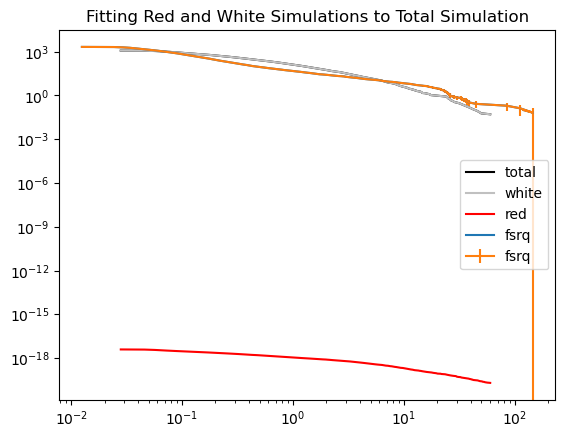

In [ ]:
# Scalar for white noise
a = popt[0]
# Vertical shift for white noise
b = popt[1]
# Scalar for red noise
c = popt[2]
# Vertical shift for red noise
d = popt[3]


plt.plot(newx, white_and_red_noise(newx,a,b,c,d),color='black',label = 'total')
plt.plot(newx, white_noise(newx,a,b),color='silver',label='white')
plt.plot(newx, red_noise(newx,c,d),color='red',label = 'red')
plt.title('Fitting Red and White Simulations to Total Simulation')
# plt.plot(fsrq_fluencethresholds,fsrq_fluencecount,label='fsrq')
plt.errorbar(fsrq_fluencethresholds,fsrq_fluencecount,yerr=fsrq_fluencecount_error/15,label='fsrq')
plt.legend()
plt.yscale('log')
plt.xscale('log')

In [177]:
#np.seterr(all='ignore')
#gfit = curve_fit(gwhite_and_red_noise,fsrq_fluencethresholds,1/fsrq_fluencecount,sigma=1/fsrq_fluencecount_error/15,absolute_sigma=False)
popt,pcov = curve_fit(white_and_red_noise_with_offset,fsrq_fluencethresholds[0:200],fsrq_fluencecount[0:200],sigma=fsrq_fluencecount_error[0:200]/15,absolute_sigma=False,p0=[1,1,0])
print(popt)
print(pcov)

[-2.58778740e+00  7.61165187e-01  5.10559678e+04]
[[ 1.98585647e+06 -9.51911870e+04 -3.93908742e+10]
 [-9.51911870e+04  4.56294952e+03  1.88818483e+09]
 [-3.93908742e+10  1.88818483e+09  7.81345981e+14]]


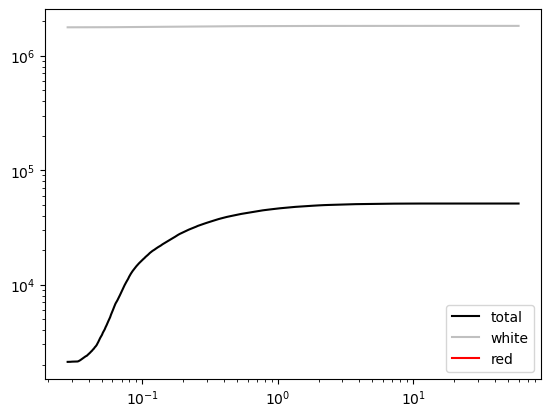

In [114]:
# Scalar for white noise
a = popt[0]
# Scalar for red noise
c = popt[1]
# Offset for both
e = popt[2]


plt.plot(newx, white_and_red_noise_with_offset(newx,a,c,e),color='black',label = 'total')
plt.plot(newx, white_noise(newx,a,b),color='silver',label='white')
plt.plot(newx, red_noise(newx,c,d),color='red',label = 'red')
#plt.plot(simulated_fsrq_fluencethresholds,simulated_fsrq_fluencecount,label='simulated total')
plt.legend()
plt.yscale('log')
plt.xscale('log')

## Testing for Convolution

In [115]:
def conv_white_then_red(x,a,b,c,d,):
    return c*redsimfsrqspline(a*whitesimfsrqspline(x)+b)+d

def conv_red_then_white(x,a,b,c,d):
    return a*whitesimfsrqspline(c*redsimfsrqspline(x)+d)+b

# Scalar for white noise
a = popt[0]
# Vertical shift for white noise
b = popt[1]
# Scalar for red noise
c = popt[2]
# Vertical shift for red noise
d = popt[3]


plt.plot(newx, conv_red_then_white(newx,a,b,c,d),color='green',label = 'red_then_white')
plt.plot(newx, conv_white_then_red(newx,a,b,c,d),color='black',label = 'white_then_red')
plt.plot(newx, white_noise(newx,a,b),color='silver',label='white')
plt.plot(newx, red_noise(newx,c,d),color='red',label = 'red')
plt.plot(simulated_fsrq_fluencethresholds,simulated_fsrq_fluencecount,label='simulated total')
plt.legend()
plt.yscale('log')
plt.xscale('log')

IndexError: index 3 is out of bounds for axis 0 with size 3

In [97]:
print(fsrq_fluencecount[-1])
print((fsrq_fluencecount_error[-1])/15)
print(fsrq_fluencethresholds[-1])

0.0
0.0
171.18345599999998


In [36]:
# Keep messing with fit of graph to get curvefit to line up with white_and_red_noise data
# Determine a,b,c,d.
# Keep fiddling with bayesian blocks
# Begin looking into the different types of noise (red,white,pink,blue, etc) and start prepping a presentation
# Keep taking notes on what you test and what you find, so that you can show everything you did and what you found

[[Model]]
    (Model(step, prefix='step_', form='linear') + Model(linear, prefix='line_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 146
    # data points      = 31984
    # variables        = 5
    chi-square         = 4.6933e+08
    reduced chi-square = 14676.1655
    Akaike info crit   = 306858.858
    Bayesian info crit = 306900.723
    R-squared          = 0.96111372
[[Variables]]
    step_amplitude: -1840.19512 +/- 49.4753216 (2.69%) (init = 614.291)
    step_center:     0.06449354 +/- 0.00137596 (2.13%) (init = 0.2303747)
    step_sigma:      0.10229807 +/- 0.00275660 (2.69%) (init = 2)
    line_slope:     -10.7109190 +/- 0.35640601 (3.33%) (init = 0)
    line_intercept:  2132.17224 +/- 49.4573312 (2.32%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(step_amplitude, line_intercept) = -0.9996
    C(step_center, line_intercept)    = -0.9991
    C(step_amplitude, step_center)    = +0.9980
    C(step_amplitude, step_sigma)

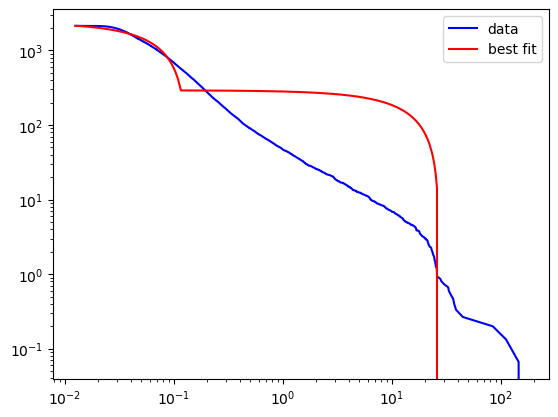

In [37]:
# model data as Step + Line
step_mod = StepModel(form='linear', prefix='step_')
line_mod = LinearModel(prefix='line_')

model = step_mod + line_mod

# make named parameters, giving initial values:
pars = model.make_params(line_intercept=fsrq_fluencecount.min(),
                         line_slope=0,
                         step_center=fsrq_fluencethresholds.mean(),
                         step_amplitude=fsrq_fluencecount.std(),
                         step_sigma=2.0)

# fit data to this model with these parameters
out = model.fit(fsrq_fluencecount, pars, x=fsrq_fluencethresholds)

# print results
print(out.fit_report())

# plot data and best-fit
plt.plot(fsrq_fluencethresholds, fsrq_fluencecount, 'b',label='data')
plt.plot(fsrq_fluencethresholds, out.best_fit, 'r-',label='best fit')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()

## Testing White Noise and Red Noise Examples

In [38]:
# Here I'm generating a random white noise array, and then generating a random red noise array from this.
mean=0
std=1
N=1000
w=np.random.normal(mean,std,size=N)
correlcoeff=0.583838383438
r=np.zeros(N)
r[0]=w[0]
for i in range(1,len(w)-1):
    r[i]=correlcoeff*r[i-1]+((1-r[i]**2)**0.5)*w[i]

Text(0.5, 1.0, 'Raw Noises')

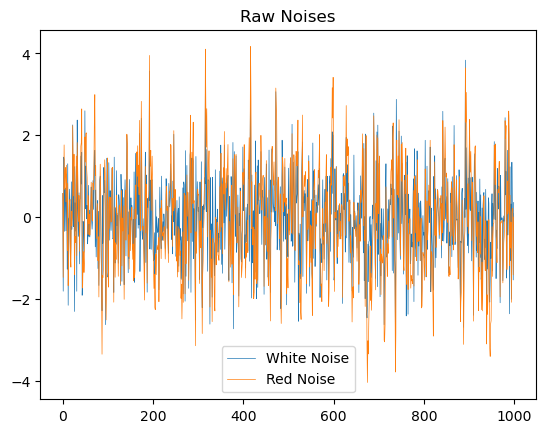

In [14]:
plt.plot(w, linewidth=0.5,label='White Noise')
plt.plot(r, linewidth=0.5,label='Red Noise')
plt.legend()
plt.title('Raw Noises')

In [15]:
signal_input=np.linspace(0,10,1000)
signal_output=np.sin(signal_input)

In [16]:
white_noisy_signal= signal_output + 0.2 * w
red_noisy_signal= signal_output + 0.2 * r

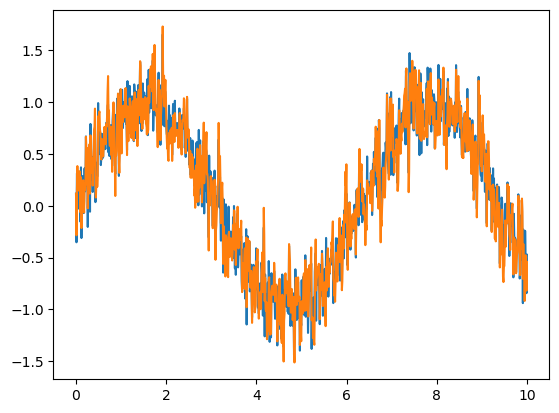

In [17]:
plt.plot(signal_input,white_noisy_signal,label='white noise')
plt.plot(signal_input,red_noisy_signal,label='red noise')

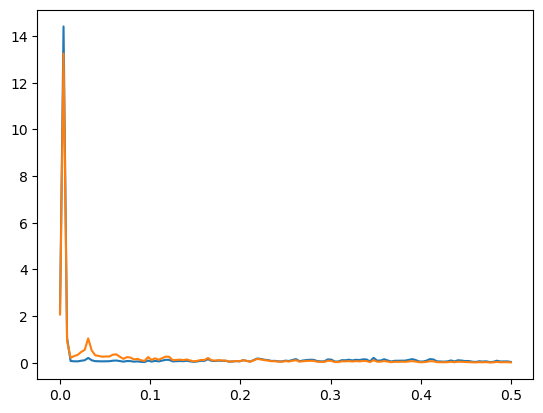

In [198]:
white_f,white_psd = scipy.signal.welch(white_noisy_signal)
red_f, red_psd = scipy.signal.welch(red_noisy_signal)

plt.plot(white_f, white_psd, label='White Noise')
plt.plot(red_f, red_psd, label='Red Noise')
#plt.xscale('log')
#plt.yscale('log')

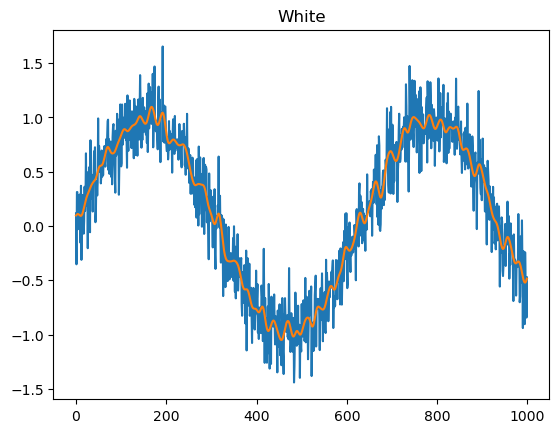

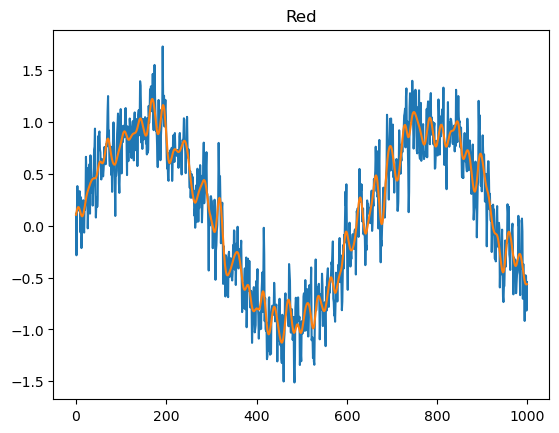

In [19]:
af2,af1 = scipy.signal.butter(3,0.1)
filtered_white_signal = scipy.signal.filtfilt(af2,af1,white_noisy_signal)
filtered_red_signal = scipy.signal.filtfilt(af2,af1,red_noisy_signal)

plt.plot(white_noisy_signal,label='White Noise')
plt.plot(filtered_white_signal, label = 'Filtered')
plt.title('White')
plt.show()

plt.plot(red_noisy_signal,label='Red Noise')
plt.plot(filtered_red_signal, label = 'Filtered')
plt.title('Red')
plt.show()

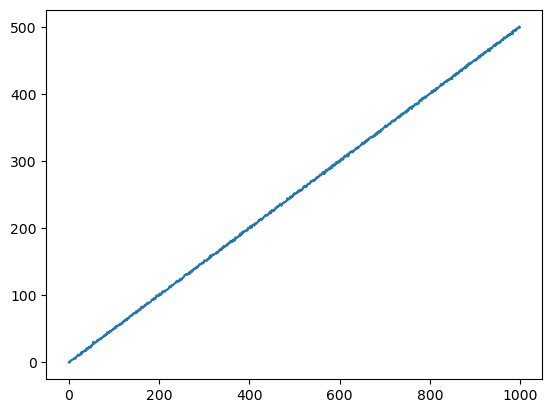

In [197]:
samplelog = np.linspace(0.1,500,1000)
plt.plot(samplelog+w,)
#plt.yscale('log')
#plt.xscale('log')

In [241]:

pd.DataFrame(total_flares[total_flares[:,0]!='0'])

,0,1,2,3,4
0,4FGL J0001.2-0747,1,1.65e-07,6.92e-08,-3333
1,4FGL J0001.2-0747,2,1.445e-07,5.06631276176274e-08,-3333
2,4FGL J0001.2-0747,4,1.3499999999999998e-07,3.863588843290652e-08,-3333
3,4FGL J0001.2-0747,2,1.325e-07,4.411249822896001e-08,-3333
4,4FGL J0001.2-0747,1,2.21e-07,8.4e-08,-3333
...,...,...,...,...,...
75671,4FGL J2359.2-3134,1,1.39e-07,8.43e-08,0.99
75672,4FGL J2359.2-3134,1,8.73e-07,6.82e-07,0.99
75673,4FGL J2359.2-3134,1,2.15e-07,9.22e-08,0.99
75674,4FGL J2359.2-3134,2,1.225e-07,5.1495266772782136e-08,0.99
